<br></br>
<b><h2>Phase1: Data analysis & preparation</h2></b>

<br></br>
<b><h2>Importing Python Libraries</h2></b>

In [335]:
import random
from pprint import pprint
import pandas as pd
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
!pip install missingno

<br></br>
<b><h2>Loading the Data</h2></b>

In [341]:
# Load dataset
df = pd.read_csv('UniversalBank.csv', delimiter = ',')
print(df.shape)
df.head(10)

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


<br></br>
<b><h2>Insights</h2></b>

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [343]:
df.describe(include="all")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [346]:
# df.loc[:, "DeadlineRespected"].value_counts(normalize=True) * 100
df.loc[:, "CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [348]:
(df.loc[:, "CreditCard"] == 1).sum()

1470

<br></br>
<b><h2>Data Cleaning</h2></b>

In [349]:
newdf = df.dropna(axis = 0)
newdf.reset_index(drop=True, inplace=True)

In [350]:
# Check for missing data and duplicates
newdf.isnull().sum()
# print('Duplicates:', df.duplicated().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

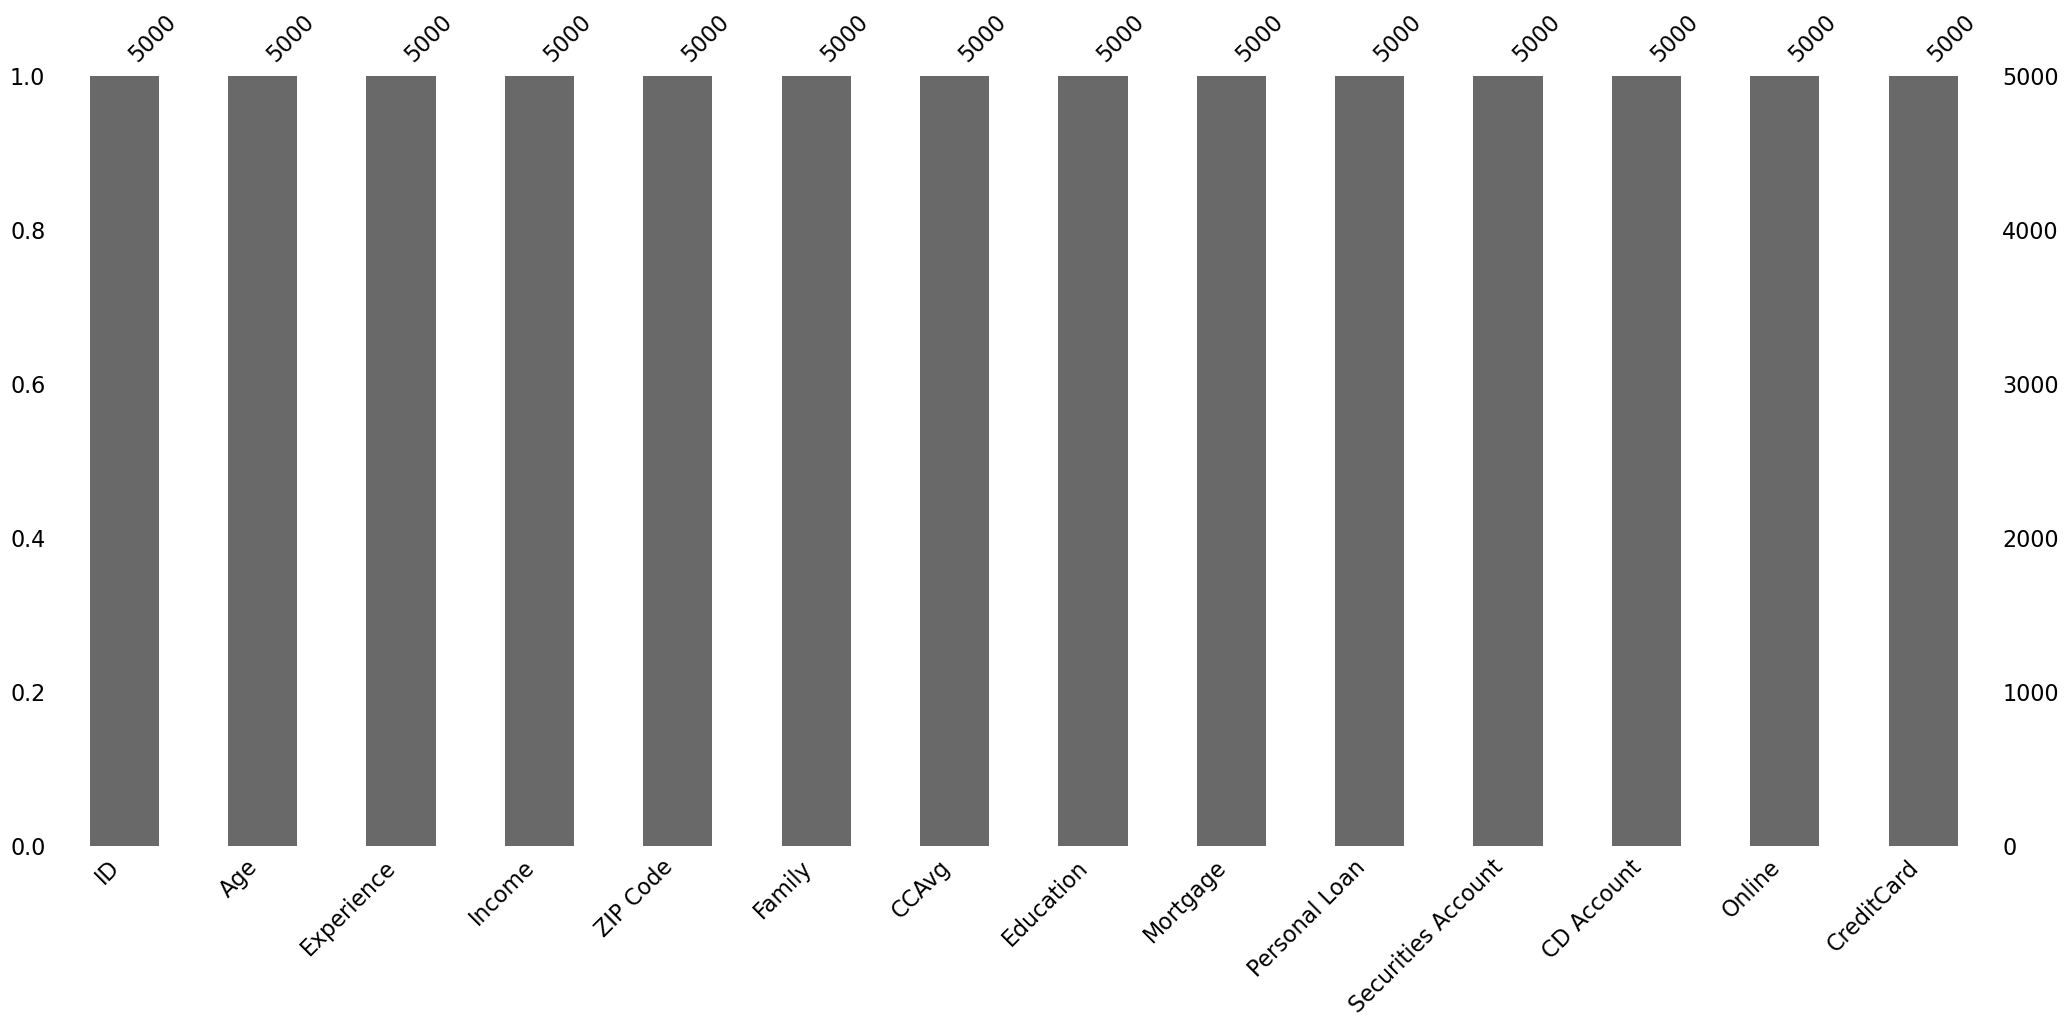

In [351]:
msno.bar(newdf)

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

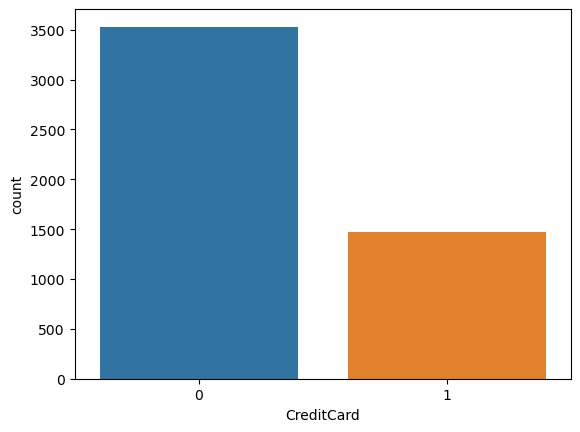

In [396]:
sns.countplot(data = newdf, x="CreditCard")

In [358]:
# #Increasing the number of data instances - Oversampling
# # assume `X` is the feature matrix and `y` is the target variable
# # `X` has shape (n_samples, n_features) and `y` has shape (n_samples,)
# # `y` contains binary labels (0 for the majority class and 1 for the minority class)
# X = newdf.iloc[:, :-1].values
# y = newdf.iloc[:, -1].values

# # count the number of instances in each class
# n_positive = sum(y)
# # (df.loc[:, "DeadlineRespected"] == 1).sum()
# n_negative = len(y) - n_positive

# print(n_positive)

# # calculate the desired number of positive instances
# # we can set it to be equal to the number of negative instances
# n_desired_positive = n_negative

# # loop through the instances and duplicate the positive ones
# X_resampled = []
# y_resampled = []
# for i in range(len(X)):
#     if y[i] == 1:  # positive instance
#         X_resampled.append(X[i])
#         y_resampled.append(y[i])
#         # duplicate the positive instance until we reach the desired number
#         while len(X_resampled) < n_desired_positive + n_positive:
#             X_resampled.append(X[i])
#             y_resampled.append(y[i])
#     else:  # negative instance
#         X_resampled.append(X[i])
#         y_resampled.append(y[i])

# # shuffle the resampled data
# indices = list(range(len(X_resampled)))
# random.shuffle(indices)
# X_resampled = [X_resampled[i] for i in indices]
# y_resampled = [y_resampled[i] for i in indices]


1470


In [394]:
# df1 = pd.DataFrame(X_resampled)
# df2 = pd.DataFrame(y_resampled)
# df_new = pd.concat([df1, df2], axis=0)
# df_new.reset_index(drop=True, inplace=True)
# print(df_new.shape)
# df_new.head(10)

# df1 = pd.DataFrame(X_resampled, columns=['feature'+str(i) for i in range(pd.DataFrame(X_resampled).shape[1])])
# df2 = pd.DataFrame(y_resampled, columns=['CreditCard'])
# df_new = pd.concat([df1, df2], axis=1)
# df_new.reset_index(drop=True, inplace=True)
# df_new.head(10)

In [398]:
percentage = newdf.loc[:, "CreditCard"].value_counts(normalize=True) * 100
percentage

0    70.6
1    29.4
Name: CreditCard, dtype: float64

<b> Pie chart distribution of DeadlineRespected label </b>

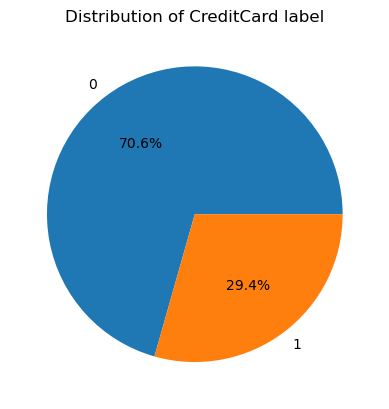

In [399]:
plt.pie(percentage, labels=["0", "1"], autopct = "%1.1f%%")
plt.title("Distribution of CreditCard label")
plt.show()

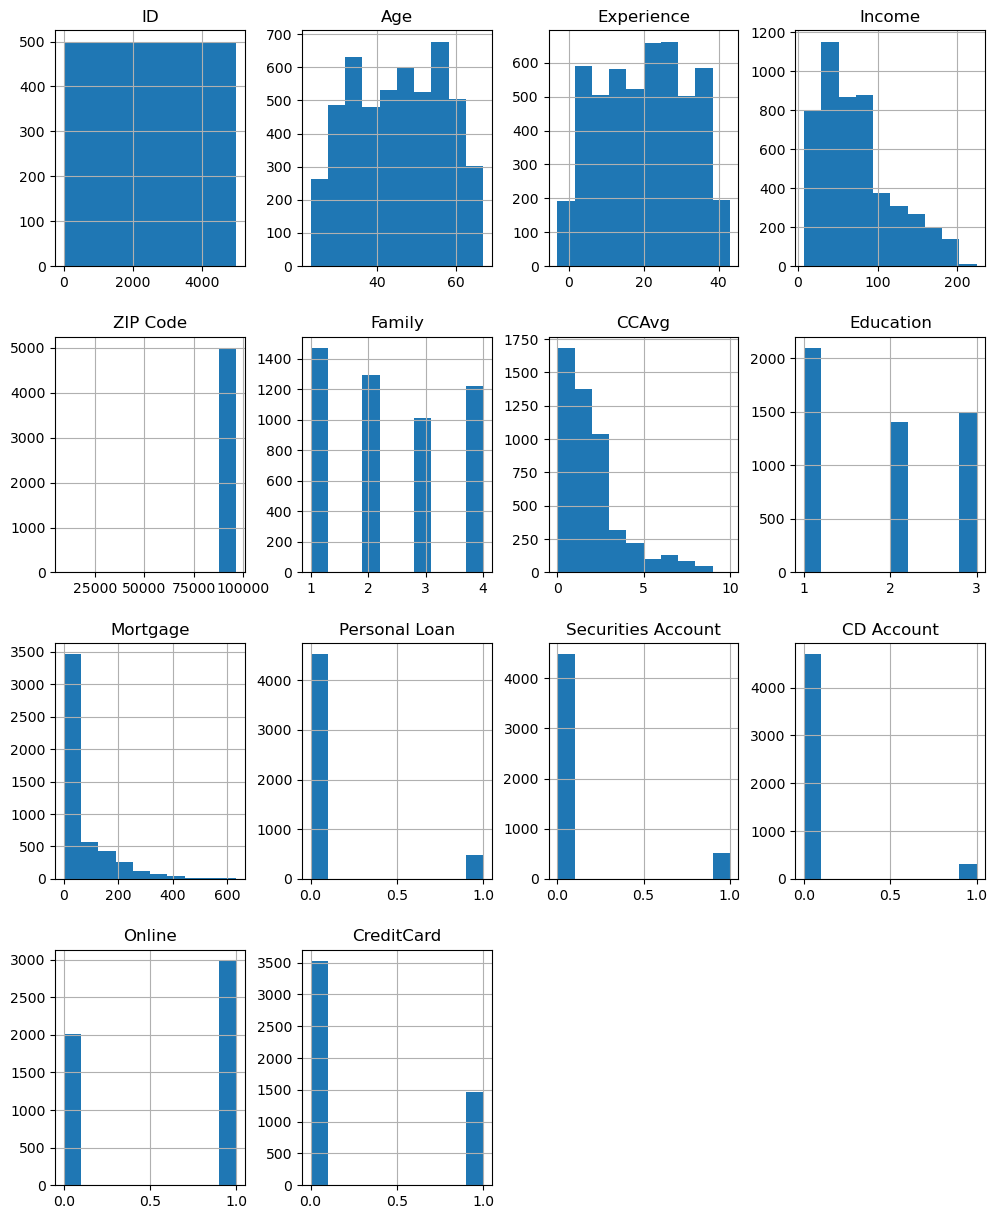

Above mean: 0.294
Below mean: 0.706


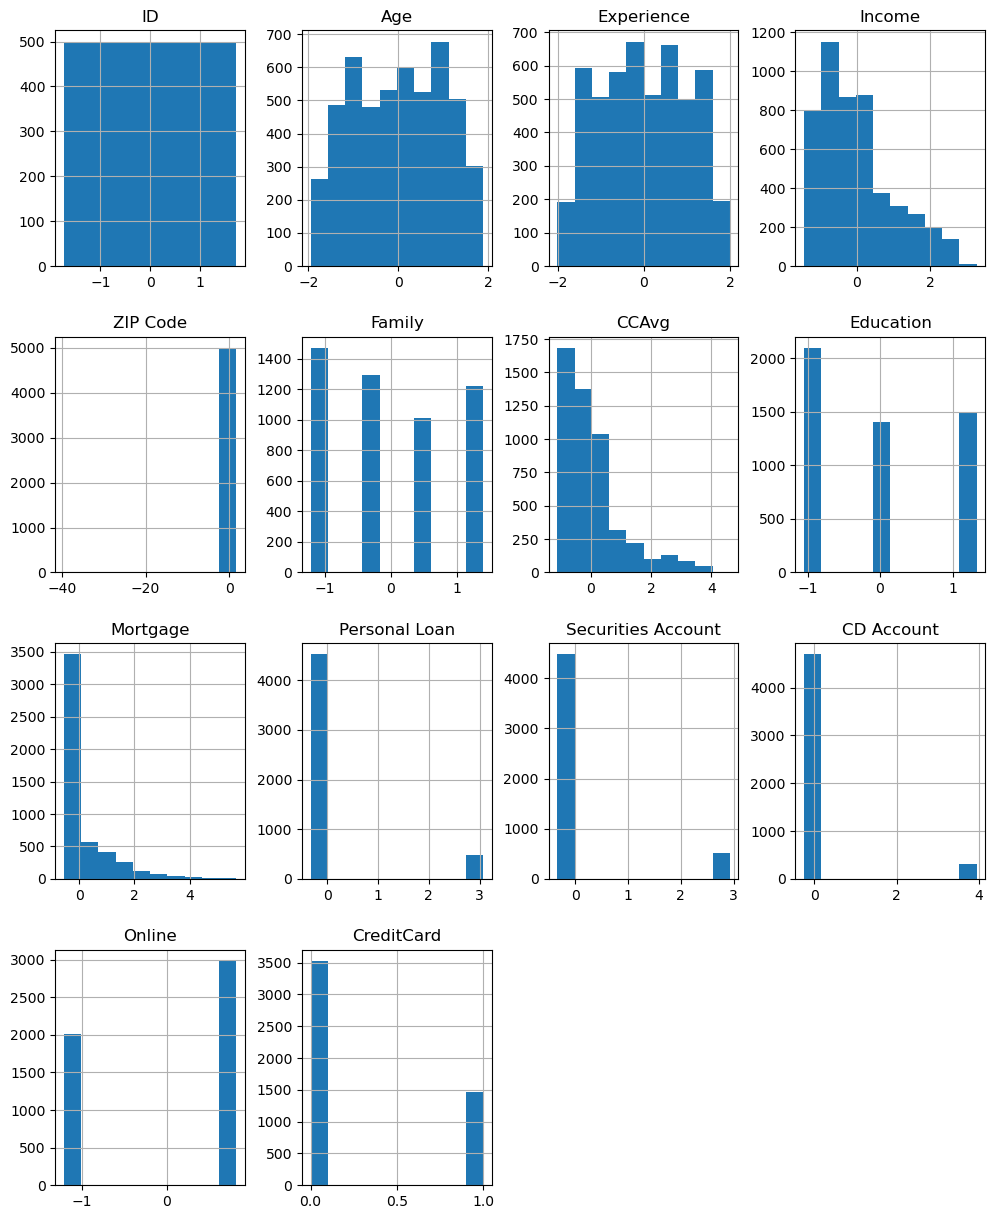

In [400]:
#Visualization before Normalization
newdf.hist(figsize=(12,15))
plt.show()


# Check balance of output labels
above_mean = (newdf['CreditCard'] > newdf['CreditCard'].mean()).sum()
below_mean = len(newdf) - above_mean
print('Above mean:', above_mean/len(newdf))
print('Below mean:', below_mean/len(newdf))

# # Normalize data
# min_val = min(df_new)
# max_val = max(df_new)
    
# # # Calculate the range of the data
# # data_range = max_val - min_val
    
    # Normalize the data
def z_score_normalization(column_name):
    series = newdf.loc[:, column_name]
    return (series - series.mean())/series.std()
    
# Iterates over all the continuous columns and applies z_score_normalization to each column
for column_name in newdf.columns:
    if column_name != "CreditCard":
        newdf[column_name] = z_score_normalization(column_name=column_name)

#Visualization after Normalization
newdf.hist(figsize=(12,15))
plt.show()


In [403]:
print(newdf.shape)

(5000, 14)


In [407]:
X = newdf.iloc[:, :-1]
y = newdf.iloc[:, -1]

<br></br>
<b><h2>Phase2: Build a model to overfit the entire dataset</h2></b>

In [409]:
model = Sequential()

model.add(Dense(1, input_dim = newdf.shape[1] -1, activation = 'sigmoid'))

In [412]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# model.add(Dense(8, activation = 'relu'))
# model.add(Dense(6, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# print(model.summary())

In [413]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
157/157 [==============================] - 0s 934us/step - loss: 0.7743 - accuracy: 0.5630
Epoch 2/50
157/157 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.6040
Epoch 3/50
157/157 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.6510
Epoch 4/50
157/157 [==============================] - 0s 989us/step - loss: 0.6170 - accuracy: 0.6934
Epoch 5/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.7262
Epoch 6/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.7354
Epoch 7/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.7412
Epoch 8/50
157/157 [==============================] - 0s 903us/step - loss: 0.5675 - accuracy: 0.7418
Epoch 9/50
157/157 [==============================] - 0s 974us/step - loss: 0.5635 - accuracy: 0.7418
Epoch 10/50
157/157 [==============================] - 0s 886us/step - loss: 0.5609 - accura

In [416]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=newdf.shape[1] - 1))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [417]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
157/157 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.7090
Epoch 2/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.7400
Epoch 3/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7420
Epoch 4/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7438
Epoch 5/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.7444
Epoch 6/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7452
Epoch 7/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5428 - accuracy: 0.7460
Epoch 8/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5399 - accuracy: 0.7456
Epoch 9/50
157/157 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.7458
Epoch 10/50
157/157 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7464